In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN, time_step 100.  seq 256. EPOCH 0050")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(175):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

    
train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label = np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(175, 100, 2)

In [12]:
train_label.shape

(175, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(256, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=50, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66304     
                                                                 
 dense (Dense)               (None, 25)                6425      
                                                                 
Total params: 72,729
Trainable params: 72,729
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
4/5 [=======================>......] - ETA: 0s - loss: 0.8284 - mae: 0.7501INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 629ms/step - loss: 0.7744 - mae: 0.7171 - val_loss: 0.1968 - val_mae: 0.3613
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.1975 - mae: 0.3625INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 528ms/step - loss: 0.1975 - mae: 0.3625 - val_loss: 0.1828 - val_mae: 0.3450
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.1333 - mae: 0.2891INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.1333 - mae: 0.2891 - val_loss: 0.1007 - val_mae: 0.2496
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.1046 - mae: 0.2565INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.1046 - mae: 0.2565 - val_loss: 0.0974 - val_mae: 0.2512
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.0867 - mae: 0.2346INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 505ms/step - loss: 0.0867 - mae: 0.2346 - val_loss: 0.0752 - val_mae: 0.2147
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.0698 - mae: 0.2079INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0698 - mae: 0.2079 - val_loss: 0.0697 - val_mae: 0.2063
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.0646 - mae: 0.1989INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 541ms/step - loss: 0.0646 - mae: 0.1989 - val_loss: 0.0640 - val_mae: 0.1959
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.0588 - mae: 0.1893INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0588 - mae: 0.1893 - val_loss: 0.0569 - val_mae: 0.1844
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.0572 - mae: 0.1852INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0572 - mae: 0.1852 - val_loss: 0.0538 - val_mae: 0.1817
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0524 - mae: 0.1772INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0524 - mae: 0.1772 - val_loss: 0.0525 - val_mae: 0.1806
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0511 - mae: 0.1762INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0511 - mae: 0.1762 - val_loss: 0.0489 - val_mae: 0.1751
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0482 - mae: 0.1698INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 477ms/step - loss: 0.0482 - mae: 0.1698 - val_loss: 0.0433 - val_mae: 0.1609
Epoch 13/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0438 - mae: 0.1614 - val_loss: 0.0527 - val_mae: 0.1782
Epoch 14/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0482 - mae: 0.1711 - val_loss: 0.0520 - val_mae: 0.1813
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0464 - mae: 0.1687INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0464 - mae: 0.1687 - val_loss: 0.0430 - val_mae: 0.1635
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.0396 - mae: 0.1550INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 517ms/step - loss: 0.0396 - mae: 0.1550 - val_loss: 0.0379 - val_mae: 0.1547
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.0364 - mae: 0.1493INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.0364 - mae: 0.1493 - val_loss: 0.0368 - val_mae: 0.1501
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.0340 - mae: 0.1424INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0340 - mae: 0.1424 - val_loss: 0.0333 - val_mae: 0.1449
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.0300 - mae: 0.1355INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 534ms/step - loss: 0.0300 - mae: 0.1355 - val_loss: 0.0326 - val_mae: 0.1410
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.0287 - mae: 0.1307INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.0287 - mae: 0.1307 - val_loss: 0.0290 - val_mae: 0.1332
Epoch 21/50
5/5 [==============================] - 1s 150ms/step - loss: 0.0262 - mae: 0.1266 - val_loss: 0.0327 - val_mae: 0.1416
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 0.0268 - mae: 0.1270INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 476ms/step - loss: 0.0268 - mae: 0.1270 - val_loss: 0.0282 - val_mae: 0.1308
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 0.0235 - mae: 0.1199INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 511ms/step - loss: 0.0235 - mae: 0.1199 - val_loss: 0.0236 - val_mae: 0.1212
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 0.0208 - mae: 0.1132INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 472ms/step - loss: 0.0208 - mae: 0.1132 - val_loss: 0.0217 - val_mae: 0.1162
Epoch 25/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0193 - mae: 0.1092 - val_loss: 0.0231 - val_mae: 0.1195
Epoch 26/50
5/5 [==============================] - 1s 146ms/step - loss: 0.0187 - mae: 0.1075 - val_loss: 0.0228 - val_mae: 0.1180
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 0.0181 - mae: 0.1065INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 476ms/step - loss: 0.0181 - mae: 0.1065 - val_loss: 0.0213 - val_mae: 0.1147
Epoch 28/50
5/5 [==============================] - 1s 162ms/step - loss: 0.0186 - mae: 0.1072 - val_loss: 0.0280 - val_mae: 0.1332
Epoch 29/50
5/5 [==============================] - 1s 147ms/step - loss: 0.0204 - mae: 0.1138 - val_loss: 0.0245 - val_mae: 0.1241
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 0.0176 - mae: 0.1040INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0176 - mae: 0.1040 - val_loss: 0.0170 - val_mae: 0.1016
Epoch 31/50
5/5 [==============================] - 1s 166ms/step - loss: 0.0145 - mae: 0.0957 - val_loss: 0.0185 - val_mae: 0.1065
Epoch 32/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0161 - mae: 0.0996 - val_loss: 0.0192 - val_mae: 0.1095
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 0.0152 - mae: 0.0977INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 468ms/step - loss: 0.0152 - mae: 0.0977 - val_loss: 0.0152 - val_mae: 0.0967
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 0.0130 - mae: 0.0892INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 505ms/step - loss: 0.0130 - mae: 0.0892 - val_loss: 0.0140 - val_mae: 0.0924
Epoch 35/50
5/5 [==============================] - 1s 165ms/step - loss: 0.0135 - mae: 0.0914 - val_loss: 0.0141 - val_mae: 0.0928
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 0.0134 - mae: 0.0917INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 471ms/step - loss: 0.0134 - mae: 0.0917 - val_loss: 0.0131 - val_mae: 0.0902
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 0.0123 - mae: 0.0867INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 476ms/step - loss: 0.0123 - mae: 0.0867 - val_loss: 0.0129 - val_mae: 0.0878
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 0.0118 - mae: 0.0849INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0118 - mae: 0.0849 - val_loss: 0.0122 - val_mae: 0.0872
Epoch 39/50
5/5 [==============================] - 1s 148ms/step - loss: 0.0120 - mae: 0.0859 - val_loss: 0.0129 - val_mae: 0.0884
Epoch 40/50
5/5 [==============================] - ETA: 0s - loss: 0.0121 - mae: 0.0870INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 469ms/step - loss: 0.0121 - mae: 0.0870 - val_loss: 0.0117 - val_mae: 0.0852
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 0.0113 - mae: 0.0843INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 505ms/step - loss: 0.0113 - mae: 0.0843 - val_loss: 0.0115 - val_mae: 0.0848
Epoch 42/50
5/5 [==============================] - 1s 149ms/step - loss: 0.0110 - mae: 0.0828 - val_loss: 0.0118 - val_mae: 0.0854
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 0.0102 - mae: 0.0794INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 468ms/step - loss: 0.0102 - mae: 0.0794 - val_loss: 0.0110 - val_mae: 0.0811
Epoch 44/50
5/5 [==============================] - ETA: 0s - loss: 0.0093 - mae: 0.0758INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 480ms/step - loss: 0.0093 - mae: 0.0758 - val_loss: 0.0100 - val_mae: 0.0795
Epoch 45/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0089 - mae: 0.0747 - val_loss: 0.0100 - val_mae: 0.0788
Epoch 46/50
5/5 [==============================] - 1s 147ms/step - loss: 0.0087 - mae: 0.0734 - val_loss: 0.0102 - val_mae: 0.0796
Epoch 47/50
5/5 [==============================] - 1s 149ms/step - loss: 0.0086 - mae: 0.0741 - val_loss: 0.0107 - val_mae: 0.0821
Epoch 48/50
5/5 [==============================] - ETA: 0s - loss: 0.0089 - mae: 0.0741INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0089 - mae: 0.0741 - val_loss: 0.0097 - val_mae: 0.0768
Epoch 49/50
5/5 [==============================] - ETA: 0s - loss: 0.0080 - mae: 0.0706INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221012_104957-28onx8ym\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0080 - mae: 0.0706 - val_loss: 0.0094 - val_mae: 0.0766
Epoch 50/50
5/5 [==============================] - 1s 158ms/step - loss: 0.0081 - mae: 0.0715 - val_loss: 0.0100 - val_mae: 0.0816


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 88ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.3779657, 1.5885963, 1.5892521, 1.7033533, 1.9128815, 2.003544 ,
        1.6401536, 1.9115151, 1.8146038, 1.8770329, 2.0070727, 2.1052058,
        1.4058069, 1.7005373, 1.7016406, 1.7818481, 2.013657 , 2.1888015,
        1.8009909, 2.0090046, 1.881032 , 2.17853  , 1.9619721, 2.3248882,
        1.5737904]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

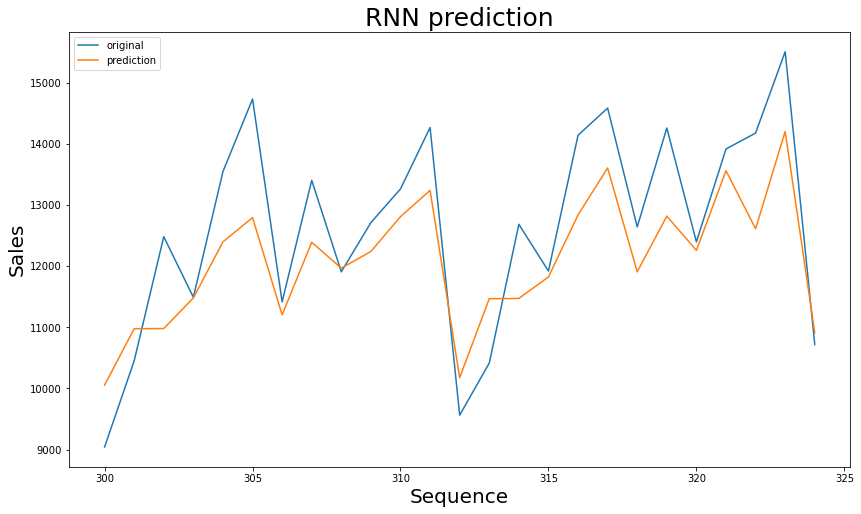

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 20ms/step - loss: 0.0496 - mae: 0.1860


[0.04956207796931267, 0.18603794276714325]